<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.419980,57.199886,65.049419,89.726600,-28.835050,265.560835,277.214363,-11.653528
1,0.0,1.0,33.420207,31.941934,80.745452,47.846681,-43.456085,160.498189,212.514782,-52.016593
2,0.0,2.0,22.435136,44.755769,89.740668,47.774880,-13.990925,200.715528,228.228975,-27.513447
3,0.0,3.0,65.695088,94.027669,75.731524,41.988499,-8.344421,279.098359,291.691021,-12.592662
4,0.0,4.0,33.522277,63.715699,75.633926,44.209301,-47.296610,179.784592,243.511116,-63.726524
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.652085,55.972099,67.445125,49.667774,-70.886369,192.850713,271.533948,-78.683235
119996,999.0,116.0,30.651801,57.062102,32.291188,84.878937,-9.234199,205.649829,197.094430,8.555399
119997,999.0,117.0,30.363590,52.341914,39.255485,55.921222,-36.398754,151.483457,181.614668,-30.131212
119998,999.0,118.0,46.043298,87.960731,76.663877,96.730444,-12.708677,304.689673,305.820371,-1.130698


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.419980  57.199886  65.049419  89.726600 -28.835050   
      1.0    33.420207  31.941934  80.745452  47.846681 -43.456085   
      2.0    22.435136  44.755769  89.740668  47.774880 -13.990925   
      3.0    65.695088  94.027669  75.731524  41.988499  -8.344421   
      4.0    33.522277  63.715699  75.633926  44.209301 -47.296610   
...                ...        ...        ...        ...        ...   
999.0 115.0  80.652085  55.972099  67.445125  49.667774 -70.886369   
      116.0  30.651801  57.062102  32.291188  84.878937  -9.234199   
      117.0  30.363590  52.341914  39.255485  55.921222 -36.398754   
      118.0  46.043298  87.960731  76.663877  96.730444 -12.708677   
      119.0  79.879431  54.350394  98.625039  67.888612 -31.036055   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    265.560835  277.214363 -11.653528  
      1.0    160.498189  212.514782 -52.016593  
      2.0    200.715528  228.228975 -27.513447  
      3.0    279.098359  291.691021 -12.592662  
      4.0    179.784592  243.511116 -63.726524  
...                 ...         ...        ...  
999.0 115.0  192.850713  271.533948 -78.683235  
      116.0  205.649829  197.094430   8.555399  
      117.0  151.483457  181.614668 -30.131212  
      118.0  304.689673  305.820371  -1.130698  
      119.0  279.707421  307.368067 -27.660646  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.419980  57.199886  65.049419  89.726600 -28.835050   
      1.0    33.420207  31.941934  80.745452  47.846681 -43.456085   
      2.0    22.435136  44.755769  89.740668  47.774880 -13.990925   
      3.0    65.695088  94.027669  75.731524  41.988499  -8.344421   
      4.0    33.522277  63.715699  75.633926  44.209301 -47.296610   
...                ...        ...        ...        ...        ...   
999.0 115.0  80.652085  55.972099  67.445125  49.667774 -70.886369   
      116.0  30.651801  57.062102  32.291188  84.878937  -9.234199   
      117.0  30.363590  52.341914  39.255485  55.921222 -36.398754   
      118.0  46.043298  87.960731  76.663877  96.730444 -12.708677   
      119.0  79.879431  54.350394  98.625039  67.888612 -31.036055   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    265.560835  277.214363 -11.653528  
      1.0    160.498189  212.514782 -52.016593  
      2.0    200.715528  228.228975 -27.513447  
      3.0    279.098359  291.691021 -12.592662  
      4.0    179.784592  243.511116 -63.726524  
...                 ...         ...        ...  
999.0 115.0  192.850713  271.533948 -78.683235  
      116.0  205.649829  197.094430   8.555399  
      117.0  151.483457  181.614668 -30.131212  
      118.0  304.689673  305.820371  -1.130698  
      119.0  279.707421  307.368067 -27.660646  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.419980,57.199886,65.049419,89.726600,-28.835050,265.560835,277.214363,-11.653528
1,0.0,1.0,33.420207,31.941934,80.745452,47.846681,-43.456085,160.498189,212.514782,-52.016593
2,0.0,2.0,22.435136,44.755769,89.740668,47.774880,-13.990925,200.715528,228.228975,-27.513447
3,0.0,3.0,65.695088,94.027669,75.731524,41.988499,-8.344421,279.098359,291.691021,-12.592662
4,0.0,4.0,33.522277,63.715699,75.633926,44.209301,-47.296610,179.784592,243.511116,-63.726524
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.652085,55.972099,67.445125,49.667774,-70.886369,192.850713,271.533948,-78.683235
119996,999.0,116.0,30.651801,57.062102,32.291188,84.878937,-9.234199,205.649829,197.094430,8.555399
119997,999.0,117.0,30.363590,52.341914,39.255485,55.921222,-36.398754,151.483457,181.614668,-30.131212
119998,999.0,118.0,46.043298,87.960731,76.663877,96.730444,-12.708677,304.689673,305.820371,-1.130698


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.419980  57.199886  65.049419  89.726600 -28.835050   
      1.0    33.420207  31.941934  80.745452  47.846681 -43.456085   
      2.0    22.435136  44.755769  89.740668  47.774880 -13.990925   
      3.0    65.695088  94.027669  75.731524  41.988499  -8.344421   
      4.0    33.522277  63.715699  75.633926  44.209301 -47.296610   
...                ...        ...        ...        ...        ...   
999.0 115.0  80.652085  55.972099  67.445125  49.667774 -70.886369   
      116.0  30.651801  57.062102  32.291188  84.878937  -9.234199   
      117.0  30.363590  52.341914  39.255485  55.921222 -36.398754   
      118.0  46.043298  87.960731  76.663877  96.730444 -12.708677   
      119.0  79.879431  54.350394  98.625039  67.888612 -31.036055   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    265.560835  277.214363 -11.653528  
      1.0    160.498189  212.514782 -52.016593  
      2.0    200.715528  228.228975 -27.513447  
      3.0    279.098359  291.691021 -12.592662  
      4.0    179.784592  243.511116 -63.726524  
...                 ...         ...        ...  
999.0 115.0  192.850713  271.533948 -78.683235  
      116.0  205.649829  197.094430   8.555399  
      117.0  151.483457  181.614668 -30.131212  
      118.0  304.689673  305.820371  -1.130698  
      119.0  279.707421  307.368067 -27.660646  

[120000 rows x 8 columns]

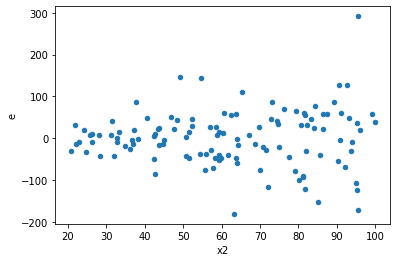

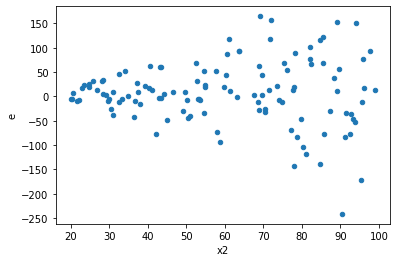

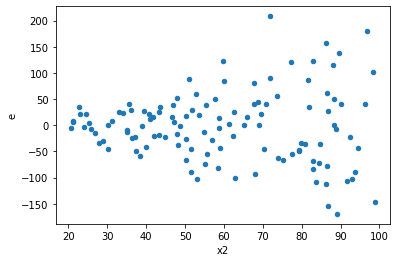

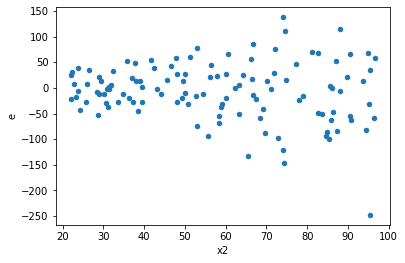

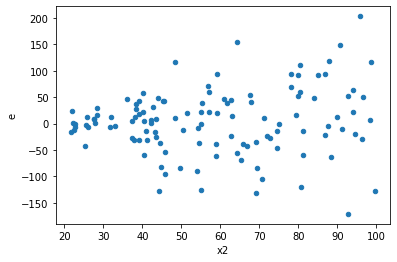

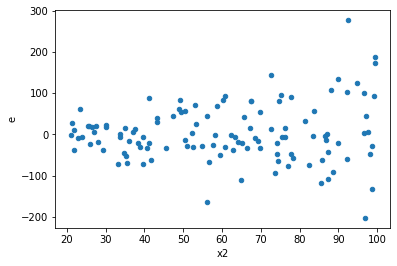

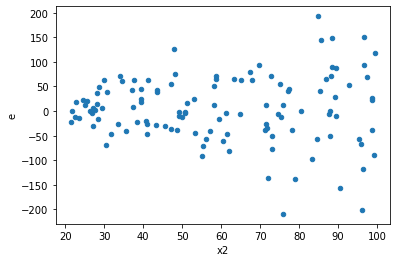

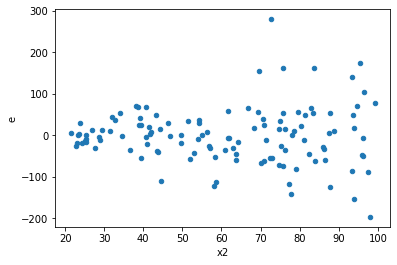

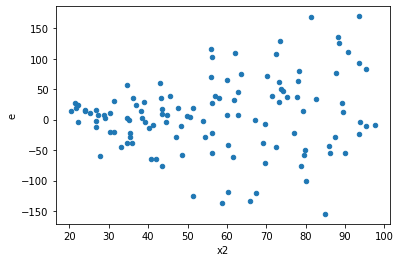

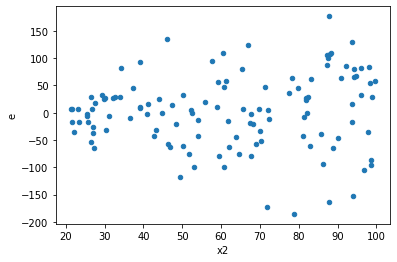

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,52.0,60.0,121504.33701460036,349905.1054317779,2336.6218656653914,5831.751757196298,2.4958046669376737,0.0007155536827661013,0.999642223158617,0.00035777684138305066,Reject005=0 : Heteroscedasticity
2.0,69.0,43.0,253969.92707109248,241619.67322126034,3680.723580740471,5619.062167936287,1.52661889562646,0.13842285241751662,0.9307885737912417,0.06921142620875831,Reject005=1 : Homoscedasticity
3.0,63.0,49.0,131253.50211854058,207175.41053752266,2083.388922516517,4228.069602806585,2.029419258742874,0.011029052927510552,0.9944854735362447,0.005514526463755276,Reject005=0 : Heteroscedasticity
4.0,62.0,50.0,190968.93316097942,235552.8123683911,3080.1440832416033,4711.056247367822,1.5294921666163794,0.12194180398532017,0.9390290980073399,0.06097090199266009,Reject005=1 : Homoscedasticity
8.0,47.0,65.0,75877.3396564282,301936.11684303905,1614.4114820516638,4645.171028354447,2.877315405643153,8.813794818651743e-05,0.9999559310259067,4.406897409325872e-05,Reject005=0 : Heteroscedasticity
9.0,54.0,58.0,213869.25589817873,289553.35547695274,3960.5417758921985,4992.299232361254,1.2605091714344132,0.3868949443169467,0.8065525278415266,0.19344747215847335,Reject005=1 : Homoscedasticity
10.0,54.0,58.0,179591.6467737498,215030.07509275695,3325.771236550922,3707.415087806154,1.1147534884723538,0.683454906219874,0.658272546890063,0.341727453109937,Reject005=1 : Homoscedasticity
11.0,58.0,54.0,183262.27309864227,193027.69725074284,3159.694363769694,3574.5869861248675,1.1313078337931974,0.6486767008448866,0.6756616495775567,0.3243383504224433,Reject005=1 : Homoscedasticity
12.0,51.0,61.0,172454.13197258086,296653.02704639995,3381.4535680898207,4863.164377809835,1.4381875367749115,0.17389768391389127,0.9130511580430544,0.08694884195694563,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,52.0,60.0,121504.33701460036,349905.1054317779,2336.6218656653914,5831.751757196298,2.4958046669376737,0.0007155536827661013,Reject005=0 : Heteroscedasticity
1.0,61.0,51.0,270825.1405814938,151553.48915864094,4439.756402975308,2971.637042326293,0.6693243440867266,0.13323333986869307,Reject005=1 : Homoscedasticity
2.0,69.0,43.0,253969.92707109248,241619.67322126034,3680.723580740471,5619.062167936287,1.52661889562646,0.13842285241751662,Reject005=1 : Homoscedasticity
3.0,63.0,49.0,131253.50211854058,207175.41053752266,2083.388922516517,4228.069602806585,2.029419258742874,0.011029052927510552,Reject005=0 : Heteroscedasticity
4.0,62.0,50.0,190968.93316097942,235552.8123683911,3080.1440832416033,4711.056247367822,1.5294921666163794,0.12194180398532017,Reject005=1 : Homoscedasticity
5.0,44.0,68.0,350048.562662127,198319.85041395685,7955.649151411978,2916.468388440542,0.366590875607294,0.0005717945192957064,Reject005=0 : Heteroscedasticity
6.0,62.0,50.0,375999.35085121467,119036.80941030204,6064.505658890559,2380.736188206041,0.3925688790010253,0.0005239398423639275,Reject005=0 : Heteroscedasticity
7.0,55.0,57.0,366704.54431058944,148337.62910341166,6667.355351101626,2602.414545673889,0.3903218605625842,0.0005995045512995764,Reject005=0 : Heteroscedasticity
8.0,47.0,65.0,75877.3396564282,301936.11684303905,1614.4114820516638,4645.171028354447,2.877315405643153,8.813794818651743e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    525
Reject005=1 : Homoscedasticity      475
Name: Result_test, dtype: int64